**Imports:**

In [1]:
import requests
import numpy as np
import pandas as pd
from scipy import stats

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn import metrics as metrics
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics as metrics

import string
import nltk

import matplotlib.pyplot as plt
import seaborn as sns

**Read in the Data:**

In [2]:
combo_df = pd.read_csv('data/combo_binarized.csv', index_col=0)
tvec_df = pd.read_csv('data/tvec_final.csv', index_col=0)
tvec_combo = pd.read_csv('data/total_tvec_df.csv', index_col=0)

Let's bring in our more unique features that we determined from notebook 03:

In [3]:
#Bring in features from both top 20 tvec lists:
tvec_top_20_esfp_feats = (tvec_df.T.sort_values('esfp', ascending = False).head(20).T).columns
tvec_top_20_inti_feats = (tvec_df.T.sort_values('intj', ascending = False).head(20).T).columns
combine = tvec_top_20_esfp_feats.append(tvec_top_20_inti_feats)
features = list(dict.fromkeys(combine))

In [4]:
#Set X and y:
X=tvec_combo[features]
y = tvec_combo['subreddit']

In [5]:
#train test split:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

**Baseline to Beat**

In [6]:
y.value_counts(normalize=True)

1    0.511039
0    0.488961
Name: subreddit, dtype: float64

So we are aiming to beat 51% accuracy score

### Model 1: Logistic Regression:

First model I have elected to use is Logisitc Regression with some GridSearching involved. I am going to determing scoring primarily on the given accuracy score through the estimator.score feature but will provide additional scores where necessary. We will also see confusion matrixes for each model to better visually display how our model performs in terms of our testing data:

In [7]:
logreg=LogisticRegression()
C_range = np.logspace(-3, 2, 20)
params = {
    'penalty':['l1', 'l2'],
    'C': C_range,
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}
logr = GridSearchCV(logreg, param_grid=params, verbose=1)
logr.fit(X_train,y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on t

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selectio

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selectio

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selectio

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selectio

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The s

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selectio

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which mean

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-03, 1.83298071e-03, 3.35981829e-03, 6.15848211e-03,
       1.12883789e-02, 2.06913808e-02, 3.79269019e-02, 6.95192796e-02,
       1.27427499e-01, 2.33572147e-01, 4.28133240e-01, 7.84759970e-01,
       1.43844989e+00, 2.63665090e+00, 4.83293024e+00, 8.85866790e+00,
       1.62377674e+01, 2.97635144e+01, 5.45559478e+01, 1.00000000e+02]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             verbose=1)

In [8]:
logr.best_params_

{'C': 4.832930238571752, 'penalty': 'l2', 'solver': 'newton-cg'}

In [9]:
logr.score(X_train, y_train)

0.6262118491921005

In [10]:
logr.score(X_test, y_test)

0.5974165769644779

In [11]:
log_preds = logr.predict(X_test)

In [12]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, log_preds).ravel()
accuracy = (tn + tp)/ (tn + fp + fn+ tp)
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
precision = tp / (tp + fp)

print('accuracy:', accuracy)
print('specificity:', specificity)
print('sensitivity:', sensitivity)
print('precision:', precision)

accuracy: 0.5974165769644779
specificity: 0.7040572792362768
sensitivity: 0.5098039215686274
precision: 0.6770833333333334


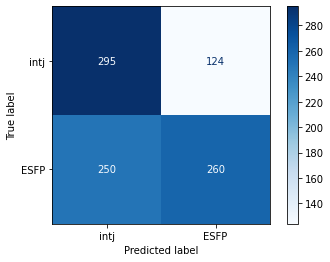

In [13]:
metrics.plot_confusion_matrix(logr, X_test, y_test, cmap='Blues', 
                      values_format='d', display_labels=['intj', 'ESFP']);

**Analysis:** We can see that we were able to make improvements to our baseline score with our initial model, although it certainly wasn't anything to celebrate. We still have a higher presence of bias, but at least we aren't experiencing any signs of model overfitting. I think considering the likeness of the language between the two subreddits this score actually isn't half bad. Let's see if we can improve with different models.

Accuracy in this case means that we were able to correctly predict roughly 60% of our classifications correctly, with only 40% misclassified. Our specificity represents our true negative rate while inversely our sensitivity is our true positive rate. So we were not that great it predicting our positive class.

### KNN

In [14]:
knn = KNeighborsClassifier(n_jobs = -1)
knn_params = {
    'n_neighbors': range(1, 10),
    'p': range(0,5),
    'weights' : ['uniform', 'distance'],
    'algorithm': ['ball_tree', 'kd_tree', 'brute']
}
knn_gridsearch = GridSearchCV(knn, param_grid=knn_params, cv=5, verbose=1)
knn_gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 1157, in fit
    return self._fit(X)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 347, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski 

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 1157, in fit
    return self._fit(X)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 347, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 1157, in fit
    return self._fit(X)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 347, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 1157, in fit
    return self._fit(X)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 347, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 1157, in fit
    return self._fit(X)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 347, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 1157, in fit
    return self._fit(X)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 347, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 1157, in fit
    return self._fit(X)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 347, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 1157, in fit
    return self._fit(X)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 347, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 1157, in fit
    return self._fit(X)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 347, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 1157, in fit
    return self._fit(X)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 347, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 1157, in fit
    return self._fit(X)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 347, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 1157, in fit
    return self._fit(X)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 347, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 1157, in fit
    return self._fit(X)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 347, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 1157, in fit
    return self._fit(X)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 347, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 1157, in fit
    return self._fit(X)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 347, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 1157, in fit
    return self._fit(X)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 347, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 1157, in fit
    return self._fit(X)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 347, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 1157, in fit
    return self._fit(X)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 347, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 1157, in fit
    return self._fit(X)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 347, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 1157, in fit
    return self._fit(X)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 347, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 1157, in fit
    return self._fit(X)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 347, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 1157, in fit
    return self._fit(X)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 347, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 1157, in fit
    return self._fit(X)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 347, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 1157, in fit
    return self._fit(X)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 347, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 1157, in fit
    return self._fit(X)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 347, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 1157, in fit
    return self._fit(X)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 347, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 1157, in fit
    return self._fit(X)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 347, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt

[Parallel(n_jobs=1)]: Done 1350 out of 1350 | elapsed:  1.5min finished


GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_jobs=-1),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': range(1, 10), 'p': range(0, 5),
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [15]:
knn_gridsearch.best_params_

{'algorithm': 'kd_tree', 'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}

In [16]:
knn_gridsearch.score(X_train, y_train)

0.6567324955116697

In [17]:
knn_gridsearch.score(X_test, y_test)

0.5866523143164694

In [18]:
knn_preds = knn_gridsearch.predict(X_test)

In [19]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, knn_preds).ravel()
accuracy = (tn + tp)/ (tn + fp + fn+ tp)
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
precision = tp / (tp + fp)

print('accuracy:', accuracy)
print('specificity:', specificity)
print('sensitivity:', sensitivity)
print('precision:', precision)

accuracy: 0.5866523143164694
specificity: 0.7159904534606205
sensitivity: 0.4803921568627451
precision: 0.6730769230769231


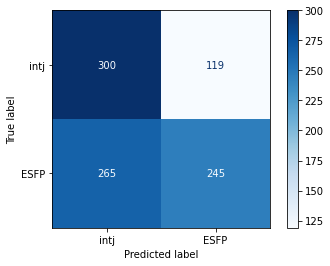

In [20]:
metrics.plot_confusion_matrix(knn_gridsearch, X_test, y_test, cmap='Blues', 
                      values_format='d', display_labels=['intj', 'ESFP']);

**Analysis:** Our testing accuracy dipped quite a bit with only a slight increase in our accuracy score on our training model, so it seems like KNN performed worse than our logistic regression model. The only metric that seemed to improve slighlty was specificity. But certainly not by enough of a margin to make a case for using this model. The only trade off being an incrase in 3 correctly predicted negative classes.

### SVM

In [21]:
clf = svm.SVC(C = 1)
gamma_range = np.logspace(-5, 2, 20)
C_range = C_range = np.logspace(-3, 2, 10)
kernel_range = ['rbf', 'sigmoid', 'linear']
param_grid = dict(gamma = gamma_range, C = C_range, kernel=kernel_range)

grid = GridSearchCV(clf, param_grid, cv=5,
                   scoring = 'accuracy', n_jobs = -1,
                   verbose = 1)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 600 candidates, totalling 3000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   27.8s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   51.0s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed:  3.4min finished


GridSearchCV(cv=5, estimator=SVC(C=1), n_jobs=-1,
             param_grid={'C': array([1.00000000e-03, 3.59381366e-03, 1.29154967e-02, 4.64158883e-02,
       1.66810054e-01, 5.99484250e-01, 2.15443469e+00, 7.74263683e+00,
       2.78255940e+01, 1.00000000e+02]),
                         'gamma': array([1.00000000e-05, 2.33572147e-05, 5.45559478e-05, 1.27427499e-04,
       2.97635144e-04, 6.95192796e-04, 1.62377674e-03, 3.79269019e-03,
       8.85866790e-03, 2.06913808e-02, 4.83293024e-02, 1.12883789e-01,
       2.63665090e-01, 6.15848211e-01, 1.43844989e+00, 3.35981829e+00,
       7.84759970e+00, 1.83298071e+01, 4.28133240e+01, 1.00000000e+02]),
                         'kernel': ['rbf', 'sigmoid', 'linear']},
             scoring='accuracy', verbose=1)

In [22]:
grid.best_params_

{'C': 0.01291549665014884, 'gamma': 100.0, 'kernel': 'sigmoid'}

In [23]:
grid.best_score_

0.622980251346499

In [24]:
grid.score(X_train, y_train)

0.6211849192100538

In [25]:
grid.score(X_test, y_test)

0.5995694294940797

In [26]:
grid_preds = grid.predict(X_test)

In [27]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, grid_preds).ravel()
accuracy = (tn + tp)/ (tn + fp + fn+ tp)
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
precision = tp / (tp + fp)

print('accuracy:', accuracy)
print('specificity:', specificity)
print('sensitivity:', sensitivity)
print('precision:', precision)

accuracy: 0.5995694294940797
specificity: 0.6992840095465394
sensitivity: 0.5176470588235295
precision: 0.676923076923077


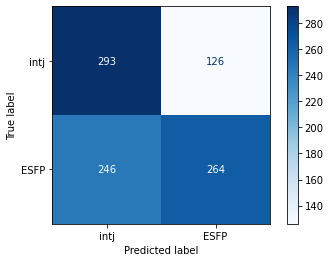

In [28]:
metrics.plot_confusion_matrix(grid, X_test, y_test, cmap='Blues', 
                      values_format='d', display_labels=['intj', 'ESFP']);

**Analysis:** A slight improvement over KNN but still underperforming compared to logistic regression from an accuracy standpoint. We did see improvements comparatively with precision and specificty again but a major drop in sensitivity. For our purposes, I think identifying the true positives is more of our concern so this model will be less than ideal for solving our problem statement. We are trying to identify incoming possible "positive" candidates as opposed to identify our negatives at a higher rate.

### Random Forests:

In [29]:
rf = RandomForestClassifier(random_state=42)
params = {
    'criterion' :['gini', 'entropy'],
    'n_estimators': [75, 100, 124],
    'max_depth': [None, 5, 10, 20, 30],
    'max_features': [None, 'auto', 4, 10]
}
forest = GridSearchCV(rf, param_grid=params, verbose=1, n_jobs=-1)
forest.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   49.9s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  1.2min finished


GridSearchCV(estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 20, 30],
                         'max_features': [None, 'auto', 4, 10],
                         'n_estimators': [75, 100, 124]},
             verbose=1)

In [30]:
forest.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'auto',
 'n_estimators': 124}

In [31]:
forest.best_score_

0.6247755834829443

In [32]:
forest.score(X_train, y_train)

0.7123877917414722

In [33]:
forest.score(X_test, y_test)

0.6060279870828849

In [34]:
forest_preds=forest.predict(X_test)

In [35]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, forest_preds).ravel()
accuracy = (tn + tp)/ (tn + fp + fn+ tp)
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
precision = tp / (tp + fp)

print('accuracy:', accuracy)
print('specificity:', specificity)
print('sensitivity:', sensitivity)
print('precision:', precision)

accuracy: 0.6060279870828849
specificity: 0.7159904534606205
sensitivity: 0.515686274509804
precision: 0.6884816753926701


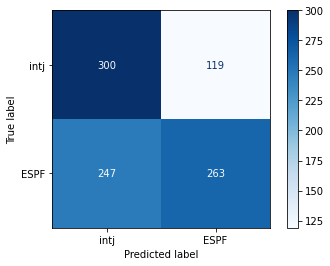

In [36]:
metrics.plot_confusion_matrix(forest, X_test, y_test, cmap='Blues', 
                      values_format='d', display_labels=['intj', 'ESPF']);

**Analysis:** This model performed similarly to our original logistic regression model but with the difference that it was way more overfit to our training set. This is pretty common with the nature of Random Forest, but if we look at the other metrics we see very similar numbers across the board in terms of sensitivity, specificty, and precision. However it still identified 6 less correct positives so wouldn't be the best model for our purposes. 

### Model Random Forests Using Full TFDIF Features Through Pipe:

In [37]:
stopwords = nltk.corpus.stopwords.words('english')
new_stops = ['poll', 'like', 'just', 'wa', 've', 'http', 'subreddit', 'people', 'know', 'time', 'get',
             'feel', 'thing', 'want', 'friend','would', 'even', 'also', 'ha', 'life', 'something', 
             'always', 'think', 'say', 'one', 'see', 'go', 'say', 'day', 'work', 'lot', 'really', 'much',
            'need', 'personality', 'person', 'enfp', 'make', 'way', 'someone', 'year', 'good',
            'anyone', 'well', 'thought', 'never', 'thought', 'going']
stopwords.extend(new_stops)

In [38]:
combo_df = combo_df[combo_df['combotext'].notna()]

In [39]:
features = 'combotext'
X_1 = combo_df[features]
y_1=combo_df['subreddit']

In [40]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, random_state=42)

In [41]:
pipe = Pipeline([
    ('tvec', TfidfVectorizer(stop_words=stopwords)),
    ('rf', RandomForestClassifier())
])
pipe_params = {
    'rf__n_estimators': [75, 100, 124],
    'rf__max_depth': [None, 4, 10, 20],
    'rf__max_features': [None, 'auto', 4, 10]
}

pipe_gs = GridSearchCV(pipe, pipe_params, cv=4, verbose=1, n_jobs=-1)
pipe_gs.fit(X_train_1, y_train_1)

Fitting 4 folds for each of 48 candidates, totalling 192 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 192 out of 192 | elapsed:  2.3min finished


GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('tvec',
                                        TfidfVectorizer(stop_words=['i', 'me',
                                                                    'my',
                                                                    'myself',
                                                                    'we', 'our',
                                                                    'ours',
                                                                    'ourselves',
                                                                    'you',
                                                                    "you're",
                                                                    "you've",
                                                                    "you'll",
                                                                    "you'd",
                                                                    'your',
  

In [42]:
pipe_gs.best_params_

{'rf__max_depth': None, 'rf__max_features': 'auto', 'rf__n_estimators': 124}

In [43]:
pipe_gs.score(X_train_1, y_train_1)

0.9891186071817193

In [44]:
pipe_gs.score(X_test_1, y_test_1)

0.6815217391304348

In [45]:
pipe_preds=pipe_gs.predict(X_test_1)

In [46]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test_1, pipe_preds).ravel()
accuracy = (tn + tp)/ (tn + fp + fn+ tp)
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
precision = tp / (tp + fp)

print('accuracy:', accuracy)
print('specificity:', specificity)
print('sensitivity:', sensitivity)
print('precision:', precision)

accuracy: 0.6815217391304348
specificity: 0.6361556064073226
sensitivity: 0.722567287784679
precision: 0.687007874015748


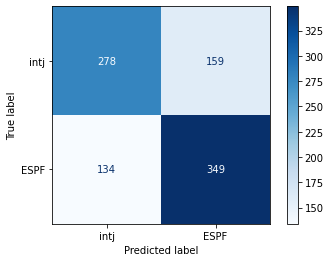

In [47]:
metrics.plot_confusion_matrix(pipe_gs, X_test_1, y_test_1, cmap='Blues', 
                      values_format='d', display_labels=['intj', 'ESPF']);

**Analysis:** Amazingly enough this incredibly overfit model was still able to perform considerably the best out of all of models on our testing data set. With a very solid sensitivity rate of identifying 355 correct ESPF candidates out of the total 483. But be cautious, this overfit model will most likely encounter issues with further unseen data despite still performing the best on this specific test set. 

### Conclusions & Recommendations:

While we set out to be able to utilize NPL analysis and modeling to determing prime candidates that match the ESPF characteristics to liven up the workplace, we certainly encountered trouble finding stark differences in language used across the two subreddits. In fact, I would say the two subreddits are more common then they are uncommon which would make it quite difficult to create a predictor model to accurately classify one versus the other simply based on speech. 

Despite these challenges we were still able to improve on the baseline with all models, with the logistic regression model being the most favored amongst them all. But if we are willing to take a risk and truly value sensitivity then we can give a shot with random forest model with ALL the tfidfvectorization data as opposed to the just more unique top features we were able to dwindle down to. 

While this may be a good starting point, if the company is truly interested in hiring the right "party starter" for the office environment, they will have to perform further due dilligence in junction with this preliminary screening system. 